In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv
%load_ext autoreload
%autoreload 2

In [2]:
dataset = "Hindbrain_pons"
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
adata.obs['cluster']=adata.obs['celltype'].to_numpy()

In [ ]:
# vv.preprocess(adata, n_gene=2000, min_shared_counts=20)

In [3]:
model_path_base = f'{root}/checkpoints/{dataset}'
figure_path_base = f'{root}/figures/{dataset}'
data_path = f'{root}/data/velovae/discrete/{dataset}'
gene_plot = ['Ptprz1','Enpp6','Rras2','Mal']

# Discrete VeloVAE

In [4]:
figure_path = f'{figure_path_base}/Discrete_VeloVAE'
model_path = f'{model_path_base}/Discrete_VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
dvae = vv.VAE(adata, 
              tmax=20, 
              dim_z=5, 
              device='cuda:0',
              discrete=True,
              init_method='steady',
              reverse_gene_mode=True)

dvae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

dvae.save_model(model_path, 'encoder', 'decoder')
dvae.save_anndata(adata, 'dvae', data_path, file_name=f'{dataset}.h5ad')

Detecting zero scaling factors: 0, 0
Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 581 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.57, 0.7402950396479713), (0.43, 0.4025060351941064)
KS-test result: [0. 1. 1.]
Initial induction: 598, repression: 1402/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 35, test iteration: 68
*********       Stage 1: Early Stop Triggered at epoch 764.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/6253 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.028
Average Set Size: 125
*********     Round 1: Early Stop Triggered at epoch 990.    *********
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 1010.    *********
Change in x0: 0.2607
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1127.    *********
Change in x0: 0.1685
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1147.    *********
Change in x0: 0.1426
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1276.    *********
Change in x0: 0.1251
*********             Velocity Refinement Round 6             *********
*********     Round 6: Early Stop Triggered at epoch 1424.    *********
Change in x0: 0.1155
*********             Velocity Refinement Round 

# Discrete Full VB

In [5]:
figure_path = f'{figure_path_base}/Discrete_FullVB'
model_path = f'{model_path_base}/Discrete_FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 discrete=True,
                 full_vb=True,
                 init_method='steady',
                 reverse_gene_mode=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'dfullvb', data_path, file_name=f'{dataset}.h5ad')

Detecting zero scaling factors: 0, 0
Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 581 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.57, 0.7402950396479713), (0.43, 0.4025060351941064)
KS-test result: [0. 1. 1.]
Initial induction: 598, repression: 1402/2000
Learning Rate based on Data Sparsity: 0.0003
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 35, test iteration: 68
*********       Stage 1: Early Stop Triggered at epoch 527.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             ***

  0%|          | 0/6253 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.027
Average Set Size: 125
*********     Round 1: Early Stop Triggered at epoch 648.    *********
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 691.    *********
Change in x0: 0.2852
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 763.    *********
Change in x0: 0.2094
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 785.    *********
Change in x0: 0.2004
*********             Velocity Refinement Round 5             *********
Stage 2: Early Stop Triggered at round 4.
*********              Finished. Total Time =   0 h :  9 m : 13 s             *********
Final: Train ELBO = -1816.679,	Test ELBO = -1851.720


# Evaluation

---   Plotting  Results   ---
computing velocity graph (using 3/32 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:01:33) --> added 
    'dvae_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'dvae_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Hindbrain_pons/eval_dvae_stream.png


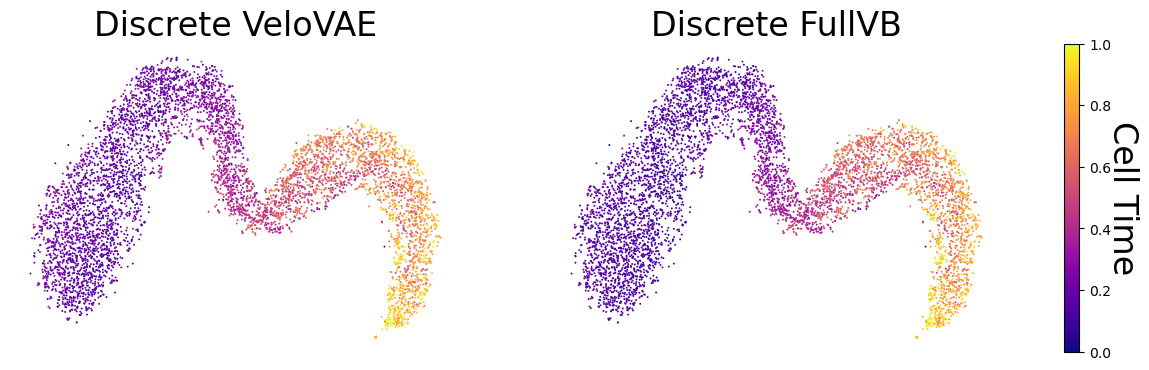

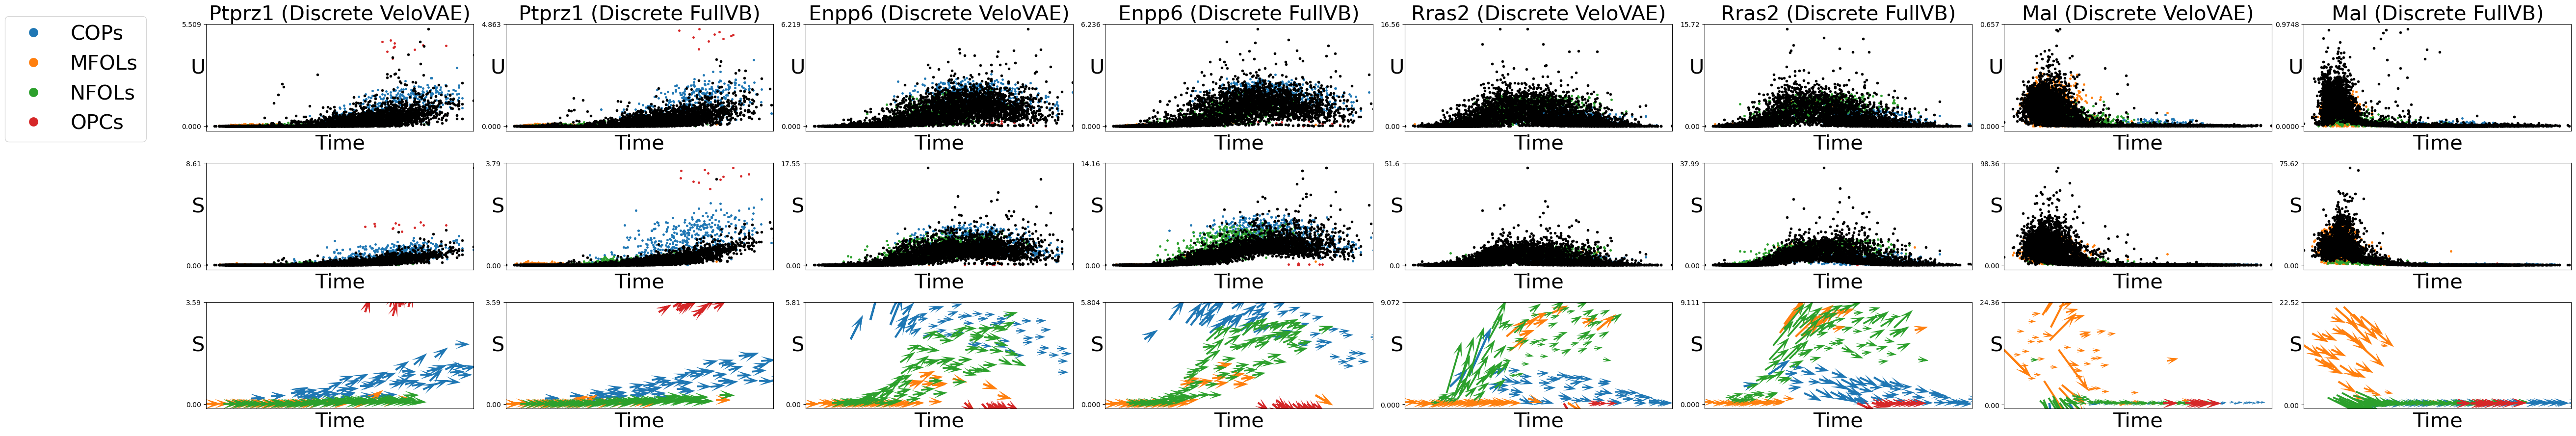

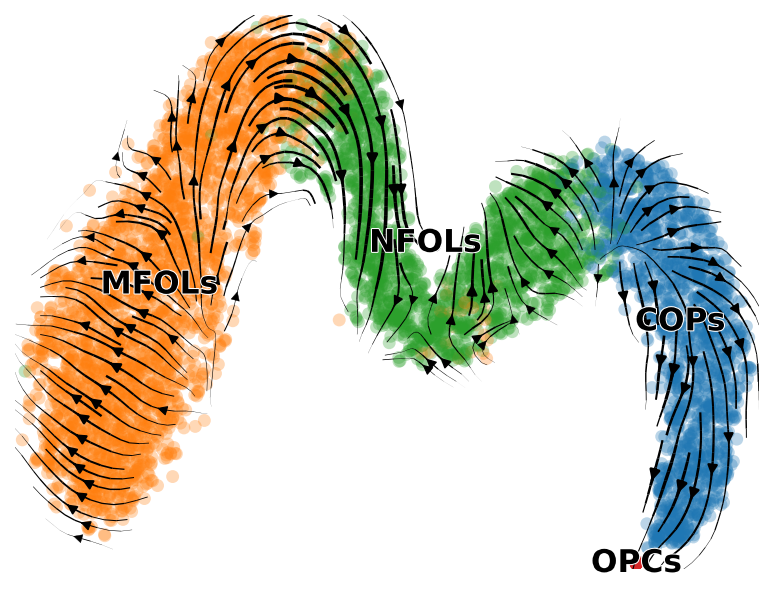

computing velocity graph (using 3/32 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:00:49) --> added 
    'dfullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'dfullvb_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /scratch/blaauw_root/blaauw1/gyichen/figures/Hindbrain_pons/eval_dfullvb_stream.png


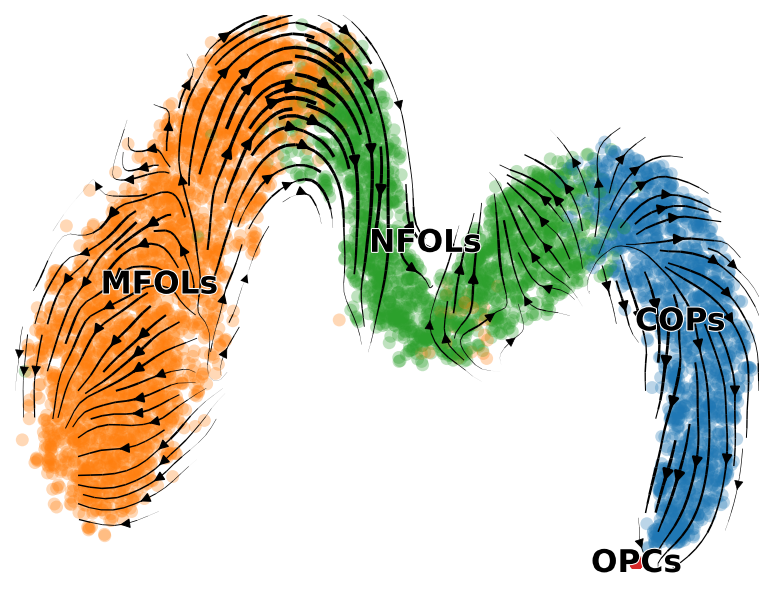

(None, None)

In [6]:
vv.post_analysis(adata,
                 'eval',
                 ['Discrete VeloVAE','Discrete FullVB'],
                 ['dvae','dfullvb'],
                 compute_metrics=False,
                 genes=gene_plot,
                 grid_size=(1,4),
                 figure_path=figure_path_base,
                 sparsity_correction=True)